## 패키지 불러오기

In [244]:
# 필요 패키지 불러오기
import pandas as pd
import numpy as np

## 데이터 불러오기

In [245]:
# 데이터 불러오기 및 상단 5개 데이터 확인
df = pd.read_csv('C:\\Users\\taek5\\Desktop\\TG\\SmartFactory\\data\\HeatTreatmentQualityAssurance\\data.csv', encoding = 'cp949')
df.head()

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,...,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,NaN,NaN,68.4386,72.8403,59.7862,51.7169,...,0.4504,NaN,NaN,859.8540,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 11:22:08,102410,75.6706,32.2732,NaN,NaN,68.4386,78.4415,61.6286,50.4453,...,0.4504,0.0000,860.3380,859.7800,860.0440,859.7860,294.6580,272.5380,328.7340,328.8650
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.1460,68.4386,78.1099,61.5414,52.0196,...,0.4503,0.0000,860.3380,859.7800,859.9810,859.7240,294.6580,272.5380,328.7340,328.8050
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.1767,68.4999,77.5072,60.6663,52.6942,...,0.4502,0.0000,860.3380,859.8420,859.9500,859.5990,294.7190,272.5380,328.6740,328.8650
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.2075,68.4386,76.0262,61.1634,51.6915,...,0.4502,0.0000,860.3510,859.7910,859.9910,859.7310,294.7210,272.5990,328.7400,328.8080


## 데이터 타입 확인

In [246]:
# 데이터의 기본 정보 확인
df.dtypes

TAG_MIN               object
배정번호                   int64
건조 1존 OP             float64
건조 2존 OP             float64
건조로 온도 1 Zone        float64
건조로 온도 2 Zone        float64
세정기                  float64
소입1존 OP              float64
소입2존 OP              float64
소입3존 OP              float64
소입4존 OP              float64
소입로 CP 값             float64
소입로 CP 모니터 값         float64
소입로 온도 1 Zone        float64
소입로 온도 2 Zone        float64
소입로 온도 3 Zone        float64
소입로 온도 4 Zone        float64
솔트 컨베이어 온도 1 Zone    float64
솔트 컨베이어 온도 2 Zone    float64
솔트조 온도 1 Zone        float64
솔트조 온도 2 Zone        float64
dtype: object

## 데이터의 타입 변경

In [247]:
# 날짜 데이터 형식 변환
df['TAG_MIN'] = pd.to_datetime(df.TAG_MIN, format = '%Y-%m-%d %H:%M:%S')

In [248]:
# 날짜 데이터 형식 변환 후, 데이터 타입 확인
df.dtypes

TAG_MIN              datetime64[ns]
배정번호                          int64
건조 1존 OP                    float64
건조 2존 OP                    float64
건조로 온도 1 Zone               float64
건조로 온도 2 Zone               float64
세정기                         float64
소입1존 OP                     float64
소입2존 OP                     float64
소입3존 OP                     float64
소입4존 OP                     float64
소입로 CP 값                    float64
소입로 CP 모니터 값                float64
소입로 온도 1 Zone               float64
소입로 온도 2 Zone               float64
소입로 온도 3 Zone               float64
소입로 온도 4 Zone               float64
솔트 컨베이어 온도 1 Zone           float64
솔트 컨베이어 온도 2 Zone           float64
솔트조 온도 1 Zone               float64
솔트조 온도 2 Zone               float64
dtype: object

## 결측치 처리

In [249]:
# 결측치 개수 확인
df.isnull().sum()

TAG_MIN                 0
배정번호                    0
건조 1존 OP                1
건조 2존 OP                1
건조로 온도 1 Zone         116
건조로 온도 2 Zone         148
세정기                    91
소입1존 OP              4288
소입2존 OP                 0
소입3존 OP                 2
소입4존 OP                 3
소입로 CP 값                1
소입로 CP 모니터 값          147
소입로 온도 1 Zone         130
소입로 온도 2 Zone         128
소입로 온도 3 Zone         157
소입로 온도 4 Zone         170
솔트 컨베이어 온도 1 Zone     106
솔트 컨베이어 온도 2 Zone     142
솔트조 온도 1 Zone         209
솔트조 온도 2 Zone         203
dtype: int64

In [250]:
# 시간 순으로 정렬
df = df.sort_values(by = ['배정번호', 'TAG_MIN'])

# 아래에서 위 방향으로 채우기
df = df.fillna(method = 'bfill')

In [251]:
# 결측치 처리 결과 확인
df.isnull().sum()

TAG_MIN              0
배정번호                 0
건조 1존 OP             0
건조 2존 OP             0
건조로 온도 1 Zone        0
건조로 온도 2 Zone        0
세정기                  0
소입1존 OP              0
소입2존 OP              0
소입3존 OP              0
소입4존 OP              0
소입로 CP 값             0
소입로 CP 모니터 값         0
소입로 온도 1 Zone        0
소입로 온도 2 Zone        0
소입로 온도 3 Zone        0
소입로 온도 4 Zone        0
솔트 컨베이어 온도 1 Zone    0
솔트 컨베이어 온도 2 Zone    0
솔트조 온도 1 Zone        0
솔트조 온도 2 Zone        0
dtype: int64

## 단위 변경(초 -> 분)

In [252]:
df['Date'] = df['TAG_MIN'].dt.strftime('%Y%m%d %H:%M')
df_minute = df.groupby(['배정번호', 'Date']).mean().reset_index()

C:\Users\taek5\AppData\Local\Temp\ipykernel_11764\3067151628.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_minute = df.groupby(['배정번호', 'Date']).mean().reset_index()


## 기초 통계 확인

In [253]:
# 지수표현 제거
pd.options.display.float_format = '{:.4f}'.format

In [254]:
# 지수표현 제거 후 데이터 통계치 확인
df_minute.describe()

,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
count,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000,50168.0000
mean,128421.5928,69.8949,20.4538,100.0059,100.0180,67.7182,75.6654,54.8509,53.8559,71.0864,0.4488,0.0000,859.2081,860.0021,860.0030,860.0064,283.9974,279.9296,331.8032,332.1741
std,12657.3486,3.7919,5.0941,0.4333,0.3630,1.6314,24.7033,4.3574,2.5455,2.4328,0.0189,0.0000,3.6301,0.5539,0.3504,0.4545,9.5051,6.6078,0.7868,0.8777
min,102410.0000,52.7950,0.0110,97.4647,97.9485,60.7037,0.0028,14.9716,0.1466,0.0921,0.0053,0.0000,840.4175,856.2571,858.3948,858.0560,266.3247,266.4646,328.2406,328.1277
25%,119448.0000,68.8012,19.1081,99.8177,99.8922,66.5691,65.3937,53.4699,52.5292,69.7796,0.4491,0.0000,857.9583,859.7791,859.8321,859.8467,274.7556,273.5065,331.8716,332.1792
50%,129889.0000,70.5591,21.3370,100.0021,100.0180,67.6979,82.1422,55.6892,53.8847,71.0385,0.4501,0.0000,859.5761,860.0220,860.0018,860.0002,284.5845,280.0347,332.0171,332.4237
75%,139116.0000,72.1287,23.2611,100.1872,100.1578,68.9807,94.6719,57.4713,55.2804,72.3576,0.4510,0.0000,860.2476,860.2457,860.1682,860.1532,293.3474,286.3217,332.1384,332.6252
max,148069.0000,82.5464,43.0382,102.3822,101.7595,71.3239,100.0000,70.7537,64.0622,83.2579,0.8879,0.0000,877.1157,865.9965,869.9877,881.8345,298.4264,291.6256,332.6400,333.1114


## 이상치

<Axes: >

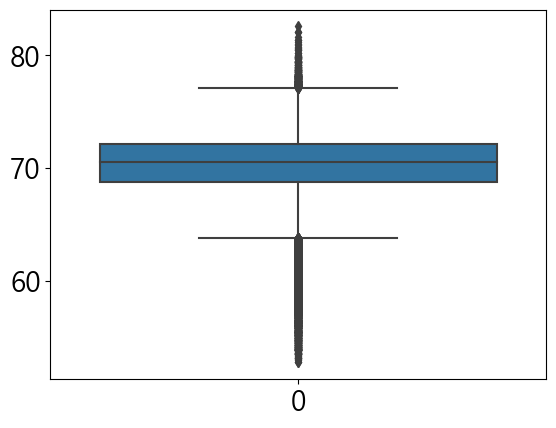

In [255]:
sns.boxplot(data = df_minute['건조 1존 OP'])

<Axes: >

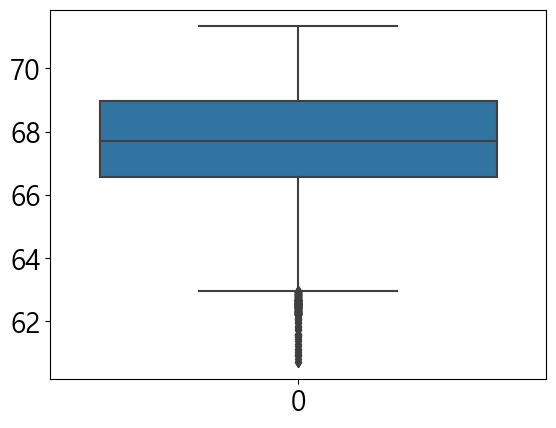

In [256]:
sns.boxplot(data = df_minute['세정기'])

<Axes: xlabel='배정번호', ylabel='건조로 온도 1 Zone'>

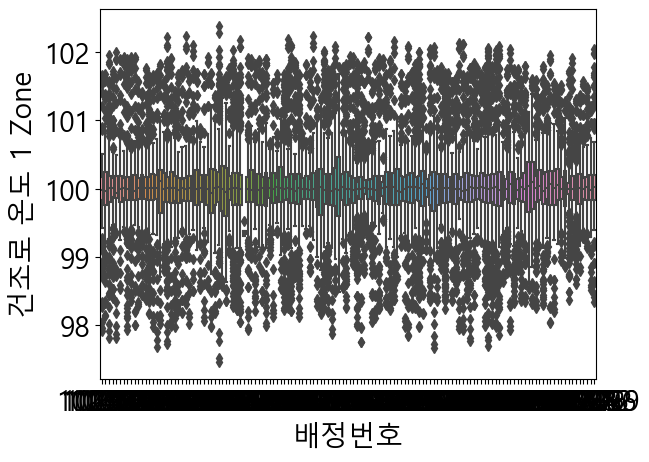

In [266]:
plt.figure(figsize = ())
sns.boxplot(x = '배정번호', y = '건조로 온도 1 Zone', data = df_minute)

## 히스토그램

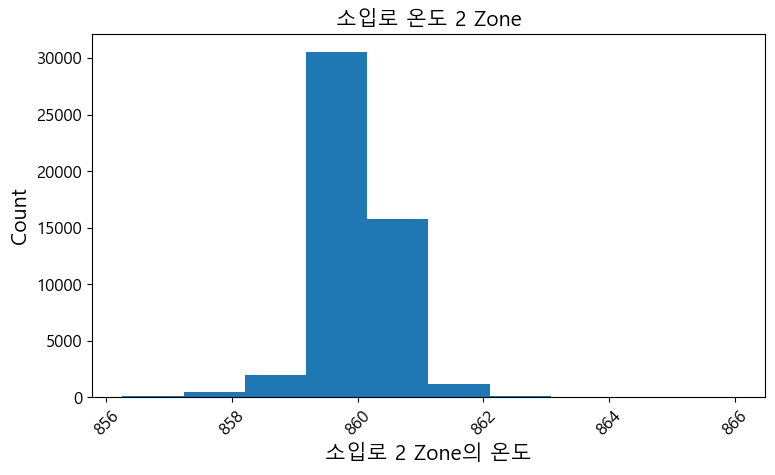

In [24]:
import matplotlib.pyplot as plt

# 데이터 시각화 : 히스토그램
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize = (8, 5))
plt.hist(df_minute['소입로 온도 2 Zone'], bins = 10)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('소입로 2 Zone의 온도')
plt.ylabel('Count')
plt.title('소입로 온도 2 Zone', fontsize = 15)
plt.tight_layout()

## 막대그래프

<Axes: xlabel='배정번호', ylabel='건조 1존 OP'>

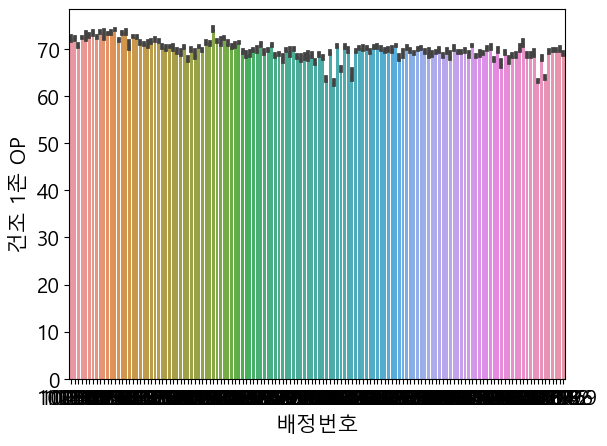

In [25]:
import seaborn as sns

sns.barplot(data = df_minute, x = '배정번호', y = '건조 1존 OP')

## 박스플롯

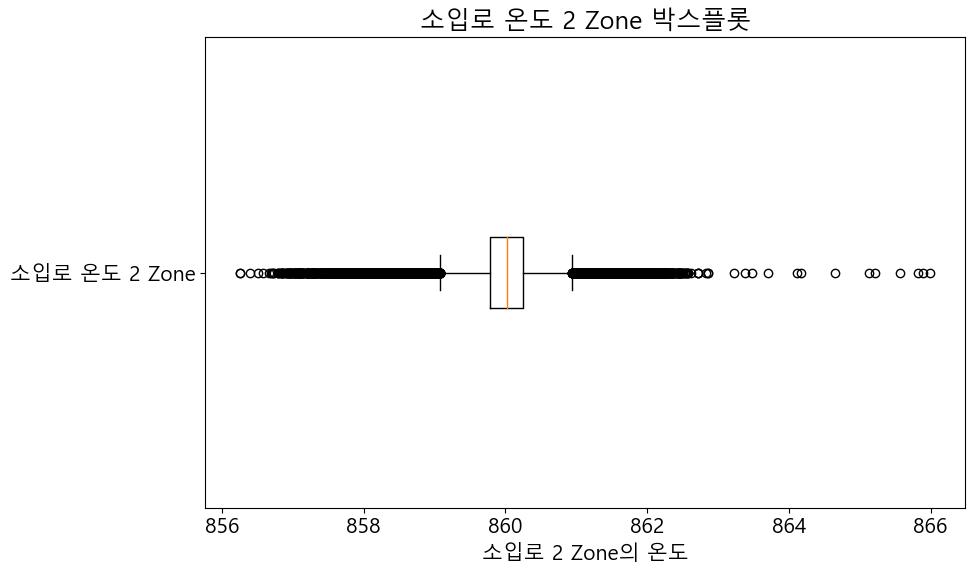

In [26]:
# 데이터 시각화 : 박스플롯
plt.figure(figsize = (10, 6))
plt.boxplot(df_minute['소입로 온도 2 Zone'], vert = False)
plt.title('소입로 온도 2 Zone 박스플롯')
plt.xlabel('소입로 2 Zone의 온도')
plt.yticks([1], ['소입로 온도 2 Zone'])
plt.tight_layout()

<Axes: xlabel='배정번호', ylabel='건조 1존 OP'>

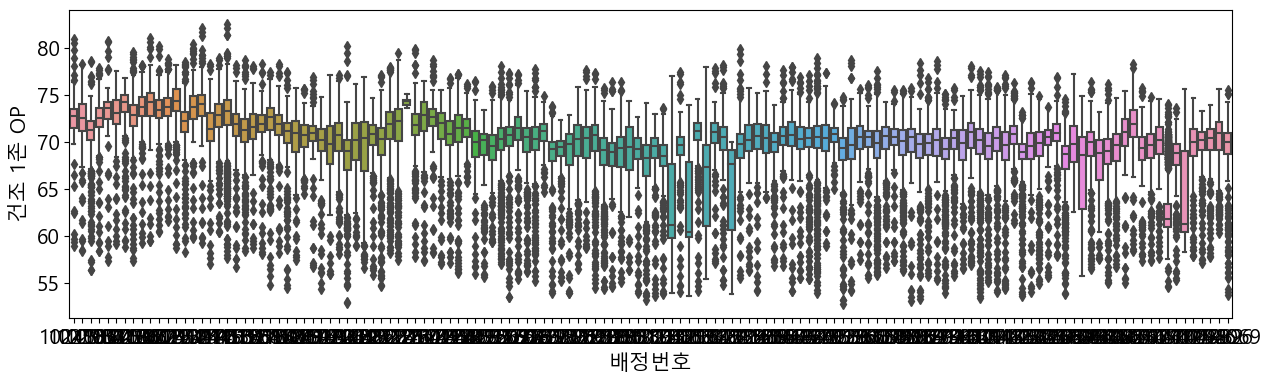

In [27]:
plt.figure(figsize = (15, 4))
sns.boxplot(data = df_minute, x = '배정번호', y = '건조 1존 OP')

## 선 그래프

<Axes: >

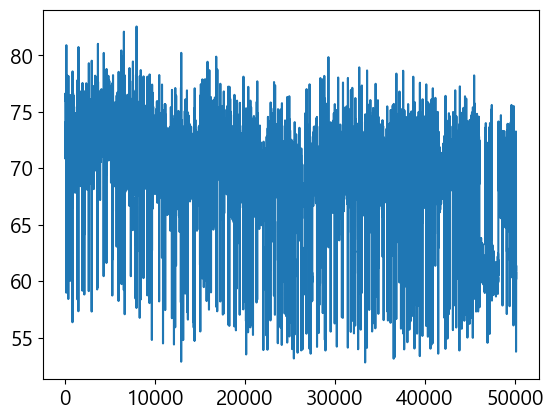

In [28]:
df_minute['건조 1존 OP'].plot()

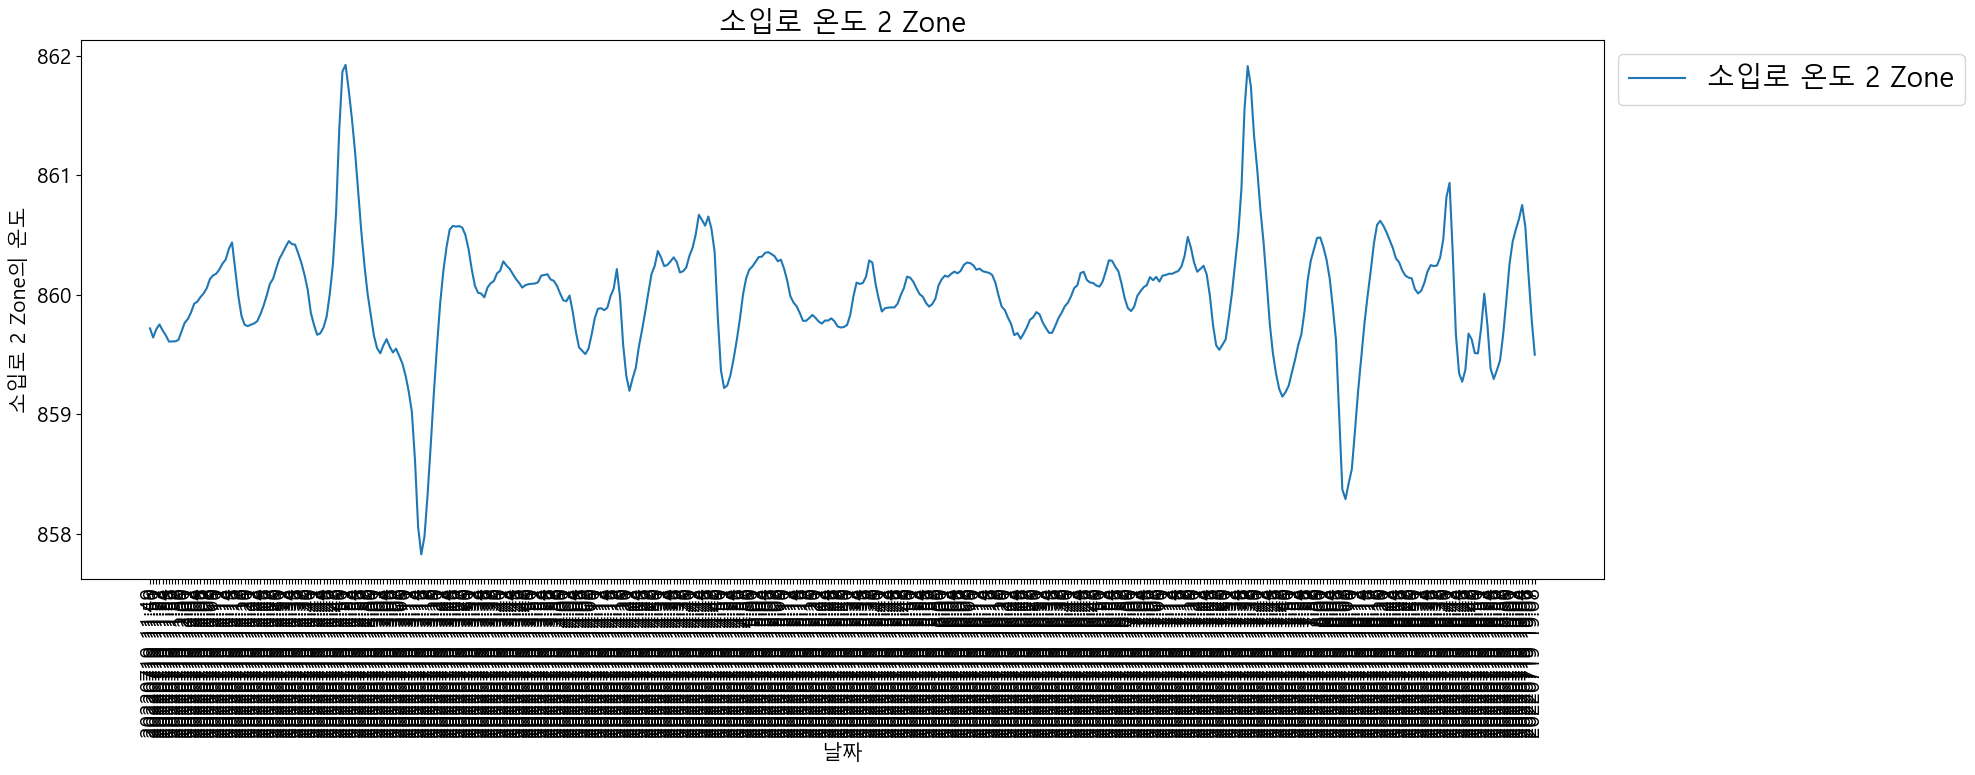

In [35]:
tmp = df_minute[df_minute['배정번호'] == 148069]
# 데이터 시각화 : 선 그래프
fig, ax = plt.subplots(figsize = (20, 8))
ax.plot(tmp['Date'], tmp['소입로 온도 2 Zone'], label = f'소입로 온도 2 Zone')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), fontsize = 20)
plt.title('소입로 온도 2 Zone', fontsize = 20)
plt.xlabel('날짜')
plt.ylabel('소입로 2 Zone의 온도')
plt.tight_layout()

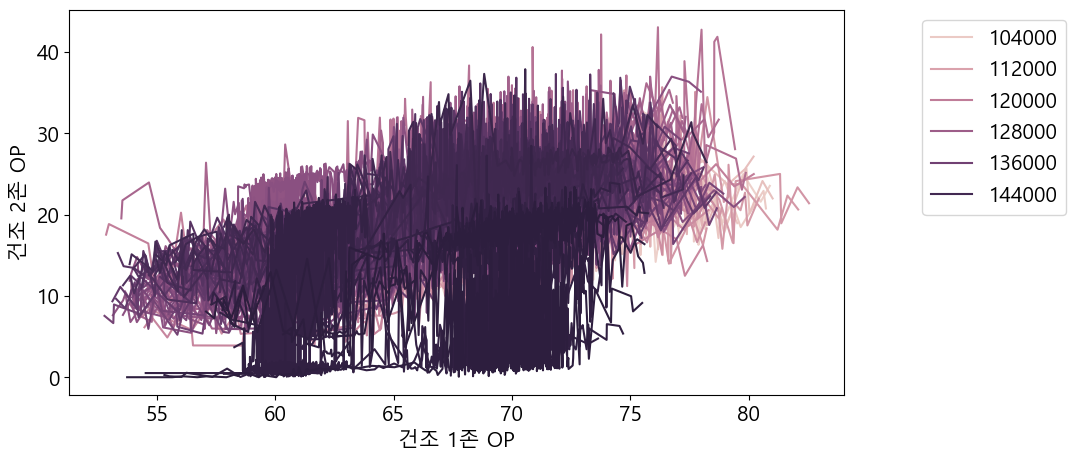

In [36]:
plt.figure(figsize = (10, 5))
sns.lineplot(data = df_minute, x = '건조 1존 OP', y = '건조 2존 OP', hue = '배정번호')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1))

## Scatter

<Axes: xlabel='건조 1존 OP', ylabel='건조 2존 OP'>

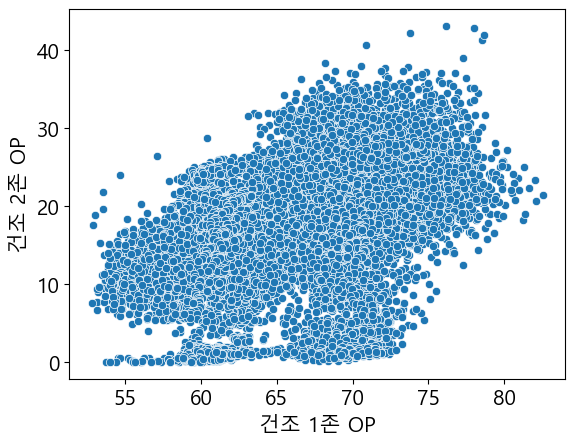

In [38]:
sns.scatterplot(data = df_minute, x = '건조 1존 OP', y = '건조 2존 OP')

# 데이터 병합 및 종속변수 라벨링

## 독립변수간의 상관관계를 파악

In [39]:
# 히트맵 옵션 설정
import matplotlib

# 음수 부호 미노출 오류 제거
matplotlib.rcParams['axes.unicode_minus'] = False

C:\Users\taek5\AppData\Local\Temp\ipykernel_11764\3153768615.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_cor = df_minute.corr().loc[['건조 1존 OP', '건조 2존 OP', '건조로 온도 1 Zone',


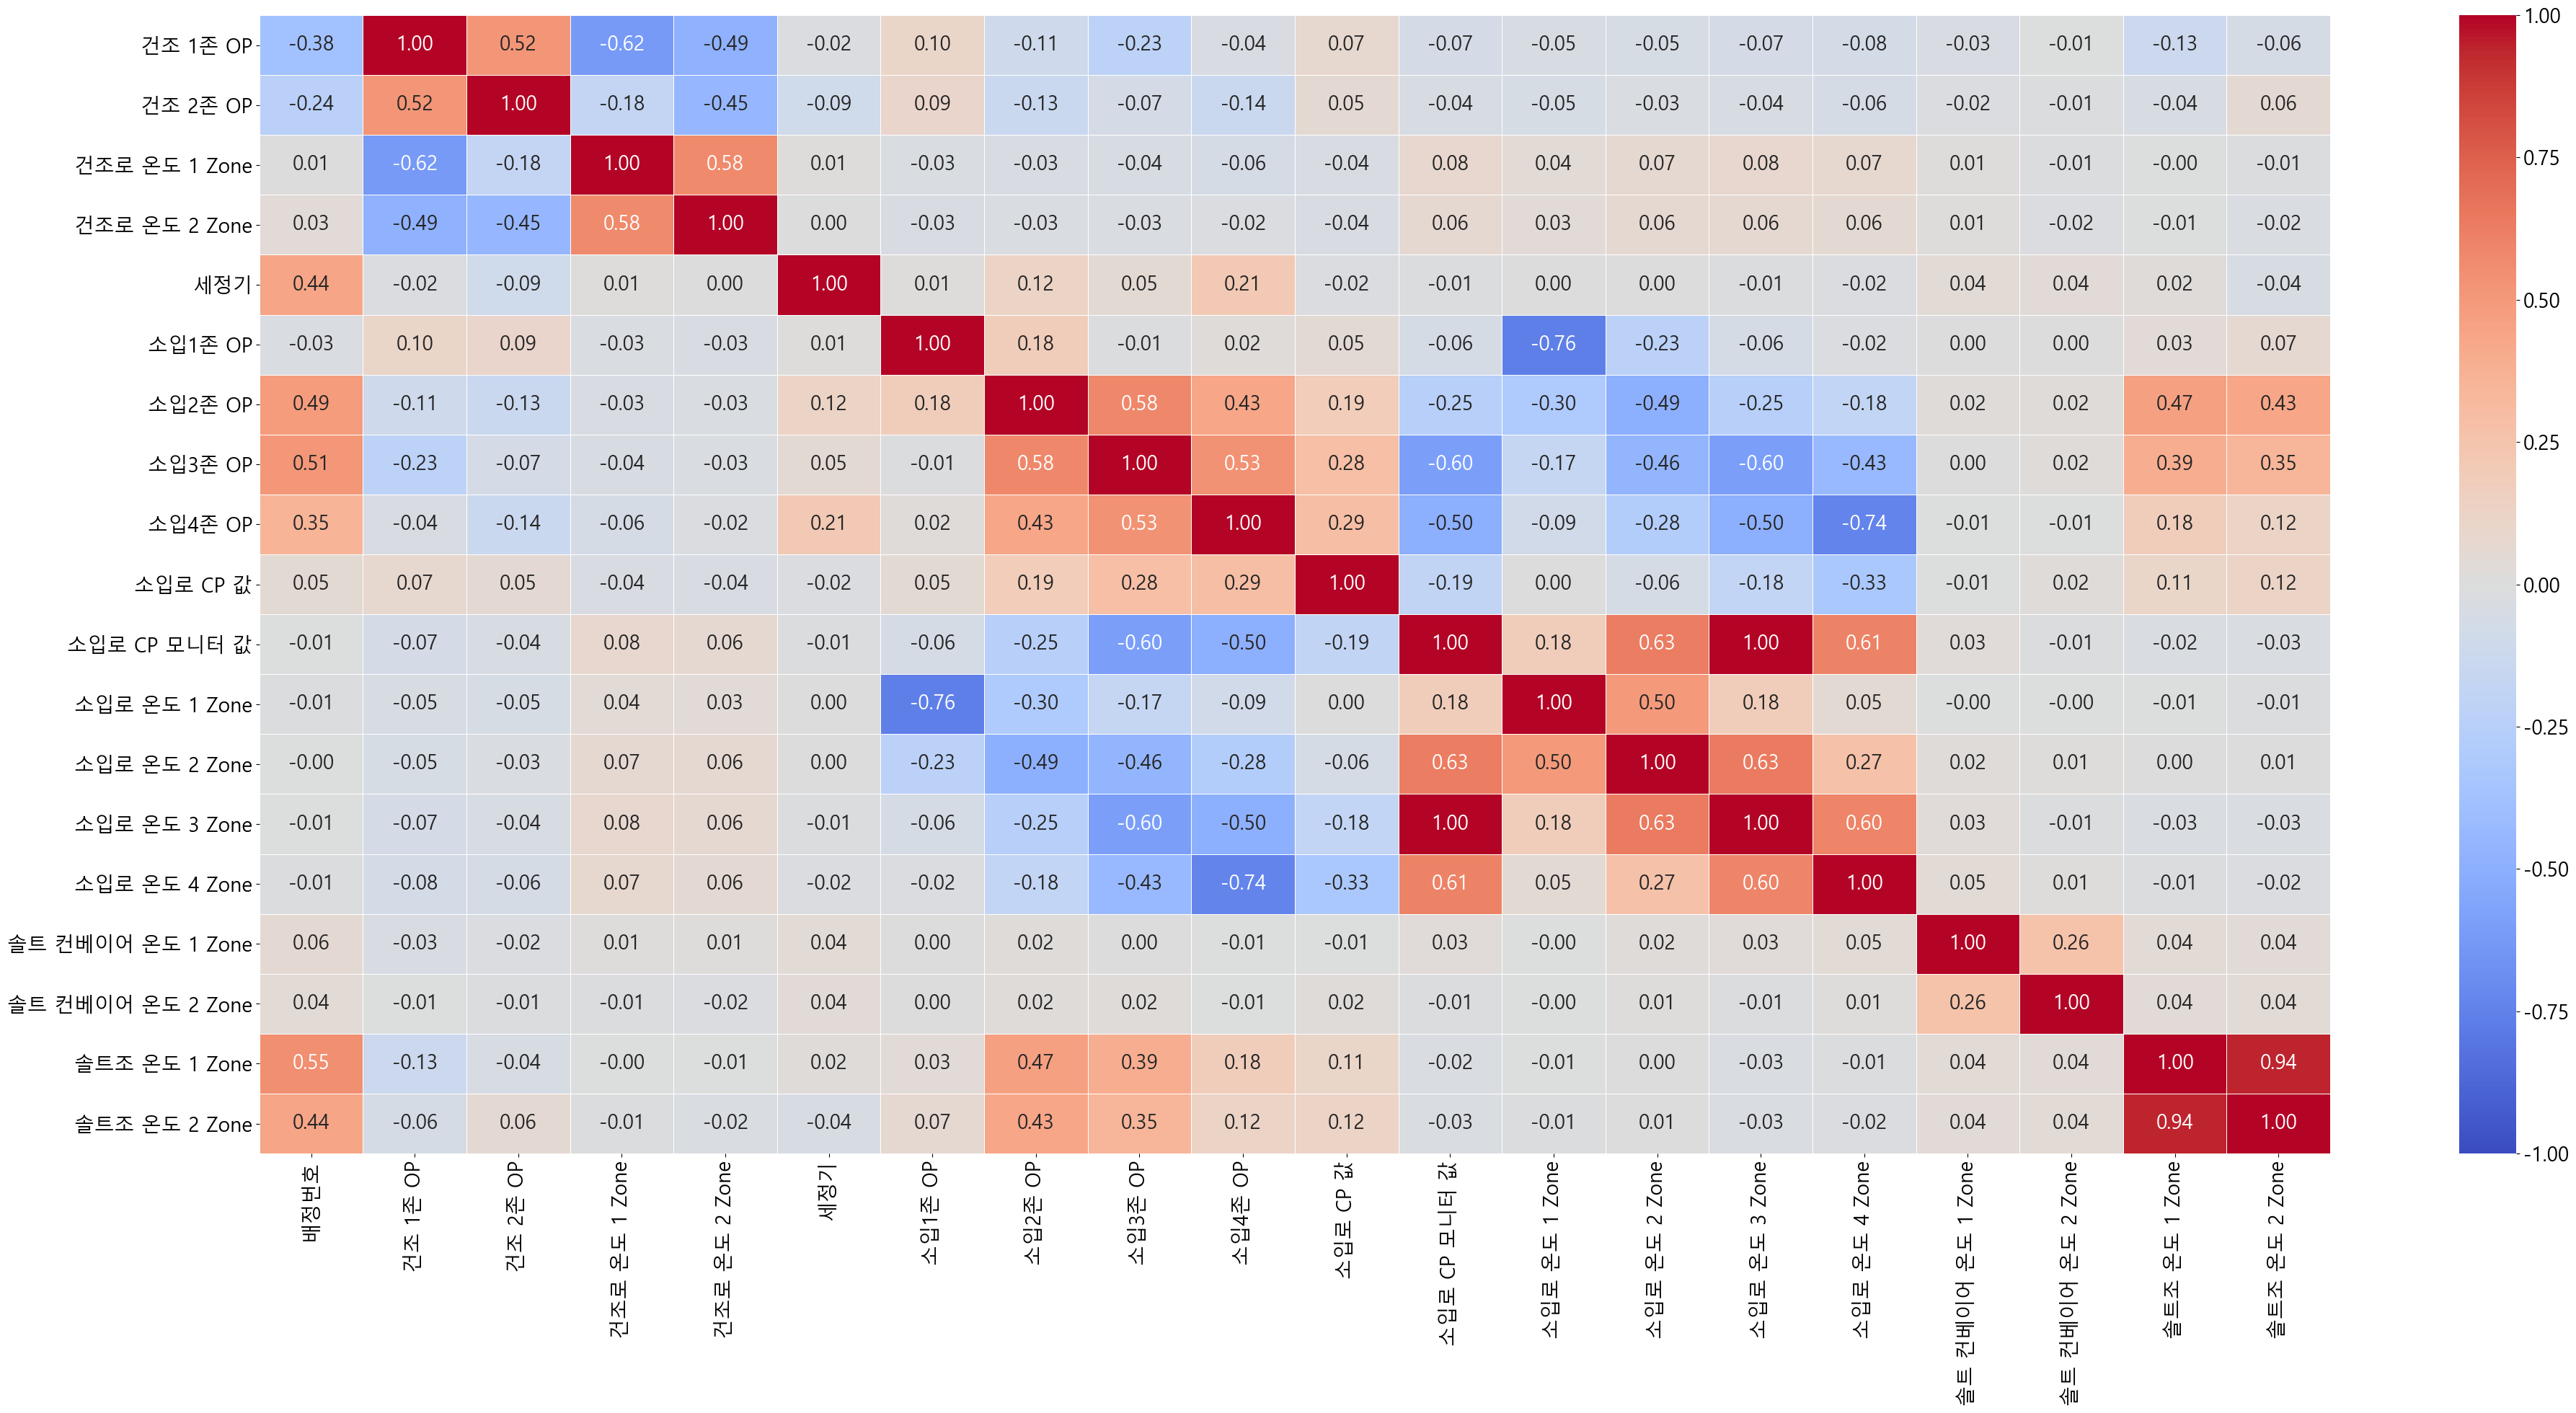

In [40]:
# 상관관계 히트맵
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Malgun Gothic'
cmap = 'coolwarm'
target_cor = df_minute.corr().loc[['건조 1존 OP', '건조 2존 OP', '건조로 온도 1 Zone',
                                   '건조로 온도 2 Zone', '세정기', '소입1존 OP', '소입2존 OP', '소입3존 OP', '소입4존 OP',
                                   '소입로 CP 값', '소입로 CP 모니터 값', '소입로 온도 1 Zone', '소입로 온도 2 Zone',
                                   '소입로 온도 3 Zone', '소입로 온도 4 Zone', '솔트 컨베이어 온도 1 Zone',
                                   '솔트 컨베이어 온도 2 Zone', '솔트조 온도 1 Zone', '솔트조 온도 2 Zone']]
# 겹치는 상관계수 제거, mask 정보 입력
# mask = np.triu(np.ones_like(target_cor, dtype = np.bool))
fig = plt.figure(figsize = (40, 20))
sns.heatmap(target_cor, 
            vmin = -1, vmax = 1,
            cmap = cmap, linewidths = .5,
           annot = True, fmt = '.2f', xticklabels = False, yticklabels = False)
plt.xticks(np.arange(0.5, len(target_cor.columns)+0.5, 1), target_cor.columns, size = 20, rotation = 90)
plt.yticks(np.arange(0.5, len(target_cor.index)+0.5, 1), target_cor.index, size = 20)
plt.tight_layout()

In [20]:
# 상관관계가 높은 변수 제거
df.drop(['소입로 CP 모니터 값', '솔트조 온도 2 Zone'], axis = 1, inplace = True)

## 공정데이터와 품질데이터 연결

In [41]:
df_min = df_minute.groupby('배정번호').min().drop(columns = 'Date')
df_min.columns = [i + '_min' for i in df_minute.columns[2:]]
df_min.reset_index(drop = False, inplace = True)
df_min

,배정번호,건조 1존 OP_min,건조 2존 OP_min,건조로 온도 1 Zone_min,건조로 온도 2 Zone_min,세정기_min,소입1존 OP_min,소입2존 OP_min,소입3존 OP_min,소입4존 OP_min,소입로 CP 값_min,소입로 CP 모니터 값_min,소입로 온도 1 Zone_min,소입로 온도 2 Zone_min,소입로 온도 3 Zone_min,소입로 온도 4 Zone_min,솔트 컨베이어 온도 1 Zone_min,솔트 컨베이어 온도 2 Zone_min,솔트조 온도 1 Zone_min,솔트조 온도 2 Zone_min
0,102410,58.9739,10.7938,97.9130,98.5301,68.4406,0.1753,54.5058,46.9765,62.8312,0.4359,0.0000,847.7547,858.9690,859.4735,858.5370,268.8620,270.2953,328.7108,328.8771
1,102585,58.4149,7.8147,98.1299,98.6609,67.8087,0.0131,50.8612,48.7442,67.1133,0.4432,0.0000,851.1176,858.8685,859.1696,858.2666,268.9533,268.6529,328.7669,328.7414
2,102930,56.3573,10.0498,97.8217,98.5620,67.4163,0.5754,39.1330,44.7962,60.7692,0.4081,0.0000,850.1007,858.7716,859.2557,858.4386,268.7786,268.5391,328.7960,328.8463
3,103142,58.3780,10.4308,98.4043,98.2523,67.1883,2.1483,42.6727,47.6140,64.1062,0.3969,0.0000,852.2612,859.2678,859.3768,858.6200,267.7614,268.8451,328.7598,328.6947
4,103675,57.3318,10.0781,97.8173,98.5772,67.9623,4.7944,41.6690,45.4255,63.7629,0.4410,0.0000,849.8728,859.3458,859.3781,858.4671,266.3247,270.4594,328.8424,328.9671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,147292,57.8382,0.3470,98.7950,99.4199,68.5085,0.5023,51.5019,52.1234,68.2021,0.4390,0.0000,852.5503,858.9623,859.3404,858.8744,270.2149,269.4231,331.8306,331.8202
132,147546,57.0834,4.7092,99.2747,99.0551,68.9439,1.8538,47.6249,51.7933,69.7283,0.4431,0.0000,855.5768,859.4751,859.1057,859.0318,270.1610,269.5899,331.6125,331.3554
133,147982,57.7769,5.1269,99.1284,99.3719,66.7972,0.6428,48.0353,51.9498,68.5659,0.4382,0.0000,852.0040,858.6583,858.9352,859.0780,270.0268,269.7996,331.9069,331.6917
134,147996,60.3376,2.5682,98.5172,98.6585,67.8701,1.1465,51.9320,52.1641,69.2893,0.3960,0.0000,851.7940,858.0220,859.1777,858.8941,270.3331,269.5727,331.6776,331.4159


In [42]:
df_max = df_minute.groupby('배정번호').max().drop(columns = 'Date')
df_max.columns = [i + '_max' for i in df_minute.columns[2:]]
df_max.reset_index(drop = False, inplace = True)
df_max

,배정번호,건조 1존 OP_max,건조 2존 OP_max,건조로 온도 1 Zone_max,건조로 온도 2 Zone_max,세정기_max,소입1존 OP_max,소입2존 OP_max,소입3존 OP_max,소입4존 OP_max,소입로 CP 값_max,소입로 CP 모니터 값_max,소입로 온도 1 Zone_max,소입로 온도 2 Zone_max,소입로 온도 3 Zone_max,소입로 온도 4 Zone_max,솔트 컨베이어 온도 1 Zone_max,솔트 컨베이어 온도 2 Zone_max,솔트조 온도 1 Zone_max,솔트조 온도 2 Zone_max
0,102410,80.8888,32.7423,101.6711,101.1890,71.1865,100.0000,63.3739,53.2175,78.7264,0.4961,0.0000,870.4061,861.2189,860.8111,861.9385,295.8820,288.3655,329.2270,329.2378
1,102585,78.2477,25.4344,101.6820,101.2092,71.3239,100.0000,64.0839,56.2302,79.8281,0.4683,0.0000,870.8343,861.6888,860.7730,861.4657,296.3536,290.5941,329.2433,329.0804
2,102930,78.5684,27.4222,101.9536,101.4112,71.2346,100.0000,51.8029,52.0113,76.2749,0.4636,0.0000,869.5294,861.5322,860.9546,861.7371,296.9325,289.8684,329.3766,329.3223
3,103142,77.8035,28.6716,101.7221,101.3488,71.2552,100.0000,49.5400,53.8809,78.6764,0.4667,0.0000,869.8356,860.7016,860.6635,861.6616,296.5394,290.1262,329.3202,329.1842
4,103675,80.7264,26.5501,102.0074,101.3339,71.0799,100.0000,47.9116,53.3408,79.1712,0.4598,0.0000,871.9544,860.8760,861.0106,862.0029,295.9068,287.7051,329.1916,329.2475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,147292,74.6931,9.3524,101.3777,101.3173,71.0530,100.0000,62.3141,57.9526,79.2408,0.4673,0.0000,868.5363,861.4286,860.4892,861.0620,297.4198,289.9195,332.4504,332.3903
132,147546,73.3003,21.1028,101.5692,101.4396,70.8805,100.0000,60.3633,59.1333,77.2782,0.4590,0.0000,871.5875,861.8936,860.5158,860.4953,297.4833,289.8468,332.4996,332.3573
133,147982,73.9282,20.8909,101.4884,101.4140,71.0261,100.0000,62.0956,59.6191,78.1854,0.4677,0.0000,869.2373,862.2876,860.6309,860.9464,296.9665,289.3087,332.3881,332.2580
134,147996,75.5970,23.4151,101.2101,101.0333,71.1569,100.0000,65.1570,60.3677,80.0718,0.4574,0.0000,867.3811,861.2463,861.1473,861.0912,297.5224,290.3666,332.4399,332.3396


In [206]:
# 배정번호별 각 변수들의 통계량 : 평균, 표준편차
df_stat = df_minute.groupby(['배정번호']).agg(['mean', 'std'])
df_stat

C:\Users\taek5\AppData\Local\Temp\ipykernel_11764\1567633964.py:2: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_stat = df_minute.groupby(['배정번호']).agg(['mean', 'std'])


건조 1존 OP        건조 2존 OP        건조로 온도 1 Zone        건조로 온도 2 Zone  \
           mean    std     mean    std          mean    std          mean   
배정번호                                                                        
102410  72.2790 3.4140  21.4036 4.2195       99.9394 0.5900      100.0499   
102585  72.2344 3.0858  18.6136 2.6641       99.9869 0.5129      100.0643   
102930  70.7085 2.9737  20.9190 2.3555       99.9967 0.4714      100.0222   
103142  72.4234 2.2699  22.2585 2.1404      100.0046 0.3322      100.0069   
103675  72.7818 3.9335  21.8871 3.4620       99.9826 0.6521      100.0413   
103719  72.8697 2.3870  22.7456 2.2557      100.0029 0.3687      100.0155   
104126  73.2950 3.3057  22.5822 2.8887      100.0486 0.3655      100.0587   
104388  72.6003 2.4025  21.0398 2.2882       99.9977 0.3801      100.0154   
105072  73.6086 1.9955  21.9733 1.5956      100.0006 0.3218       99.9974   
105815  73.1661 4.4156  23.7292 4.4427      100.0155 0.7584      100.0326   
106027  73.3173 2.0443  22.5248 1.8982       99.9979 0.3184      100.0183   
106293  73.5025 2.3109  21.2218 1.9263      100.0067 0.3846       99.9928   
107402  74.1184 2.3005  23.2129 1.9781      100.0070 0.3357      100.0100   
108503  71.9273 2.3347  21.9058 1.9503       99.9986 0.3946       99.9950   
113479  73.3996 2.6882  20.3423 2.2011      100.0061 0.4359       99.9941   
113977  73.6709 2.9507  21.9906 2.6523      100.0010 0.4879       99.9910   
114449  70.8475 4.1597  18.6681 3.7129       99.9830 0.7059      100.0031   
114453  72.6267 2.3430  19.2593 2.1163      100.0120 0.3561      100.0221   
114838  72.5850 3.3969  20.6671 3.3090       99.9952 0.4569       99.9923   
116198  71.4512 2.8811  19.3056 2.5982      100.0005 0.4772      100.0066   
116324  71.0361 2.4495  19.3359 2.4446      100.0025 0.3678      100.0013   
116413  71.0620 3.6476  18.8555 3.0496       99.9636 0.5753      100.0006   
116694  71.5976 2.6583  19.3645 2.5021       99.9986 0.4294       99.9750   
116862  71.9253 3.0881  19.5551 3.6082       99.9954 0.4206      100.0121   
117694  71.7243 1.9959  18.8924 2.3553      100.0008 0.3348       99.9987   
118005  70.5066 2.9440  17.6525 2.8090      100.0259 0.3771      100.0350   
118664  70.2743 3.1187  18.6639 3.1466      100.0354 0.4443      100.0929   
118674  70.5424 1.7643  19.8992 1.8972       99.9904 0.3056       99.9782   
118961  70.4229 3.2760  19.8640 2.9069       99.9907 0.5312      100.0316   
119202  69.5337 3.2929  18.2870 3.9210      100.0196 0.4322      100.0121   
119208  69.2377 3.8574  19.0554 3.7770       99.9355 0.6628       99.9370   
119448  70.3462 2.5776  20.7456 2.8266      100.0040 0.4132      100.0160   
119662  67.8461 4.2125  20.0152 3.3694      100.0380 0.6452      100.0065   
120395  69.8912 3.0878  20.7569 2.9128      100.0072 0.5181       99.9953   
120492  68.9271 4.8987  20.7510 5.6354       99.9928 0.7577      100.0009   
120867  70.5234 2.1996  21.2494 2.0867      100.0104 0.2948      100.0187   
121210  69.7369 3.0237  19.5779 2.7473       99.9973 0.4753      100.0101   
122221  71.3858 3.0978  24.0468 2.9941      100.0032 0.4654       99.9973   
122371  71.2371 3.7174  25.1141 3.9723       99.9992 0.5370      100.0108   
122460  74.2808 0.5940  31.1970 0.8999       99.3857 0.0808       98.8660   
123527  71.6416 2.4147  23.7893 2.1465       99.9910 0.3975      100.0092   
123689  71.5576 4.1662  25.4045 4.3747      100.0517 0.5511      100.0384   
123708  72.3875 2.4081  24.4657 2.8063       99.9841 0.4135       99.9790   
124128  71.3069 2.9919  23.5366 2.3464      100.0148 0.4290      100.0318   
124532  70.5046 2.7501  24.6383 3.0830       99.9890 0.3859      100.0068   
124585  70.8193 3.5754  24.1747 3.2505      100.0120 0.5457      100.0279   
124809  71.3386 1.5974  23.3648 1.6959       99.9982 0.2672       99.9839   
124852  69.4456 2.9929  21.3591 2.4987      100.0098 0.4732      100.0295   
124960  68.7911 3.7317  19.8927 3.6113      100.0719 0.3649      100.0951   
125

In [207]:
# 배정번호별 각 변수들의 통계량으로 변수 생성
chg_name = {'mean' : '_Avg', 'std' : '_Std'}
df_stat.columns = list(map(lambda x: x[0] + chg_name[x[1]], df_stat.columns))
df_stat.reset_index(drop = False, inplace = True)

In [208]:
# 배정번호별 각 변수들의 통계량 : 평균, 표준편차
df_stat

,배정번호,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,세정기_Avg,...,소입로 온도 4 Zone_Avg,소입로 온도 4 Zone_Std,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std
0,102410,72.2790,3.4140,21.4036,4.2195,99.9394,0.5900,100.0499,0.4960,69.6031,...,860.0129,0.5502,282.6539,9.3875,280.0968,6.0415,329.0168,0.1182,329.0708,0.1133
1,102585,72.2344,3.0858,18.6136,2.6641,99.9869,0.5129,100.0643,0.3581,69.5935,...,859.9910,0.4765,282.7642,9.5190,279.7780,7.1752,328.9986,0.0944,328.9244,0.0849
2,102930,70.7085,2.9737,20.9190,2.3555,99.9967,0.4714,100.0222,0.3441,69.5282,...,860.0077,0.4126,283.3464,9.6903,279.2893,6.6703,329.1333,0.1150,329.1484,0.1126
3,103142,72.4234,2.2699,22.2585,2.1404,100.0046,0.3322,100.0069,0.2570,69.5358,...,860.0035,0.2933,282.8963,9.4997,279.2377,6.5337,329.0819,0.0910,329.0730,0.0966
4,103675,72.7818,3.9335,21.8871,3.4620,99.9826,0.6521,100.0413,0.4710,69.3165,...,860.0068,0.5689,283.5173,9.7558,277.5625,5.3773,329.0112,0.0833,329.1142,0.0737
5,103719,72.8697,2.3870,22.7456,2.2557,100.0029,0.3687,100.0155,0.2755,69.2433,...,859.9928,0.3876,282.4849,9.4081,278.9622,6.6621,328.9767,0.0937,329.1465,0.0813
6,104126,73.2950,3.3057,22.5822,2.8887,100.0486,0.3655,100.0587,0.2837,69.8944,...,860.0027,0.3780,282.6605,9.3875,278.8058,6.1892,328.8306,0.2900,328.9441,0.3764
7,104388,72.6003,2.4025,21.0398,2.2882,99.9977,0.3801,100.0154,0.2636,66.0761,...,860.0022,0.3094,283.0446,9.3153,279.2945,6.3780,329.1464,0.1249,329.4704,0.1191
8,105072,73.6086,1.9955,21.9733,1.5956,100.0006,0.3218,99.9974,0.2167,65.7627,...,859.9944,0.3061,282.4156,9.2419,279.1085,6.2957,329.1626,0.1096,329.6110,0.0741
9,105815,73.1661,4.4156,23.7292,4.4427,100.0155,0.7584,100.0326,0.6064,64.6584,...,860.0394,0.4626,281.1056,8.8725,279.9742,6.3240,329.0365,0.0876,329.4919,0.0626


In [209]:
# 품질 데이터 불러오기
heat_result = pd.read_excel('C:\\Users\\taek5\\Desktop\\TG\\SmartFactory\\data\\HeatTreatmentQualityAssurance\\quality.xlsx')
heat_result

,배정번호,작업일,공정명,설비명,양품수량,불량수량,총수량
0,102410,2022-01-03,열처리,열처리 염욕_1,15160,3,15163
1,102585,2022-01-03,열처리,열처리 염욕_1,29892,10,29902
2,102930,2022-01-04,열처리,열처리 염욕_1,59616,30,59646
3,103142,2022-01-05,열처리,열처리 염욕_1,74730,13,74743
4,103675,2022-01-06,열처리,열처리 염욕_1,14979,2,14981
5,103719,2022-01-06,열처리,열처리 염욕_1,59671,3,59674
6,104126,2022-01-07,열처리,열처리 염욕_1,29914,0,29914
7,104388,2022-01-10,열처리,열처리 염욕_1,104740,21,104761
8,105072,2022-01-12,열처리,열처리 염욕_1,89759,8,89767
9,105815,2022-01-14,열처리,열처리 염욕_1,9020,3,9023


- 작업일에 대한 변수를 만들면 좋지 않을까?

In [210]:
# 품질 데이터 불필요한 변수 제거
heat_result.drop(['작업일', '공정명', '설비명', '양품수량'], axis = 1, inplace = True)

In [211]:
# 공정 데이터와 품질 데이터 병합
df_total = pd.merge(heat_result, df_stat, on = '배정번호', how = 'left')

In [193]:
df_total = pd.merge(df_total, df_min, on = '배정번호', how = 'left')

In [194]:
df_total = pd.merge(df_total, df_max, on = '배정번호', how = 'left')

In [212]:
# 병합 데이터 확인
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   배정번호                   136 non-null    int64  
 1   불량수량                   136 non-null    int64  
 2   총수량                    136 non-null    int64  
 3   건조 1존 OP_Avg           136 non-null    float64
 4   건조 1존 OP_Std           136 non-null    float64
 5   건조 2존 OP_Avg           136 non-null    float64
 6   건조 2존 OP_Std           136 non-null    float64
 7   건조로 온도 1 Zone_Avg      136 non-null    float64
 8   건조로 온도 1 Zone_Std      136 non-null    float64
 9   건조로 온도 2 Zone_Avg      136 non-null    float64
 10  건조로 온도 2 Zone_Std      136 non-null    float64
 11  세정기_Avg                136 non-null    float64
 12  세정기_Std                136 non-null    float64
 13  소입1존 OP_Avg            136 non-null    float64
 14  소입1존 OP_Std            136 non-null    float64
 15  소입2존 O

## 종속변수 라벨링

In [213]:
# 불량률 파생변수 생성
# 불량률 = (불량수량 / 전체수량) * 100
df_total['불량률'] = round(df_total['불량수량'] / df_total['총수량'] * 100, 3)

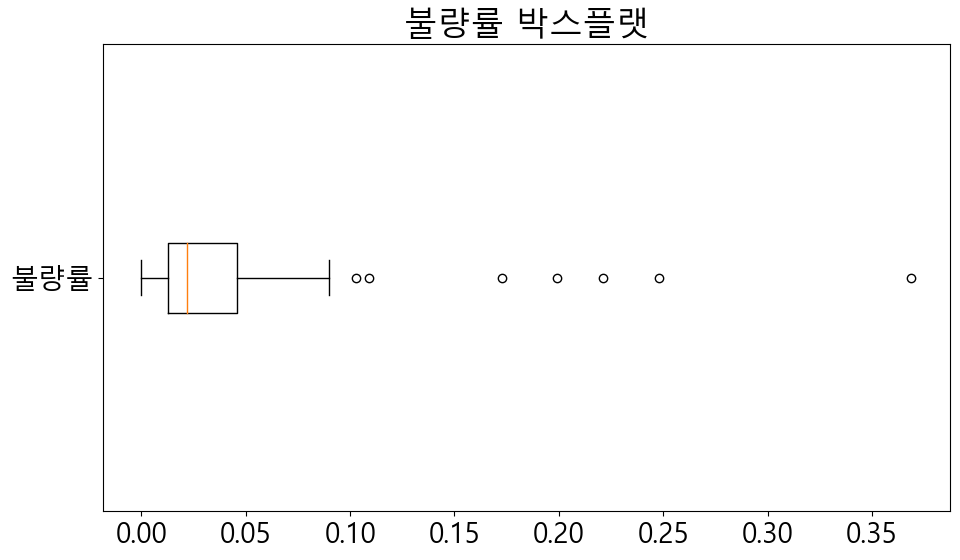

In [214]:
# 불량률 분포 파악
plt.figure(figsize = (10, 6))
plt.boxplot(df_total['불량률'], vert = False)
plt.title('불량률 박스플랫')
plt.yticks([1], ['불량률'])
plt.tight_layout()

In [215]:
# 불량률 3사분위수 값 확인
df_total['불량률'].describe()

count   136.0000
mean      0.0370
std       0.0482
min       0.0000
25%       0.0127
50%       0.0220
75%       0.0460
max       0.3690
Name: 불량률, dtype: float64

In [216]:
# 불량단계 변수 생성
df_total.loc[df_total['불량률'] >= 0.046, '불량단계'] = '위험'
df_total.loc[df_total['불량률'] < 0.046, '불량단계'] = '안정'

In [217]:
df_total['불량단계'].value_counts()

안정    101
위험     35
Name: 불량단계, dtype: int64

## PCA를 통한 주요 인자 도출

In [218]:
# PCA를 위한 표준화 작업 - 값의 크기에 따라 설명 가능한 분산량이 왜곡될 수 있으므로
from sklearn.preprocessing import StandardScaler

# 독립변수의 value값만 추출
x = df_total.drop(['배정번호', '불량수량', '총수량', '불량률', '불량단계'], axis = 1).values 

# 종속변수 추출
y = df_total['불량률'].values 

# 변형 객체 생성
scaler = StandardScaler() 

# 독립변수 스케일링
x_scaled = scaler.fit_transform(x)

In [219]:
features= df_total.columns[3: 79]
pd.DataFrame(x, columns = features)

ValueError: Shape of passed values is (136, 38), indices imply (136, 40)

In [222]:
features= df_total.columns[3: 41]
pd.DataFrame(x, columns = features)

,건조 1존 OP_Avg,건조 1존 OP_Std,건조 2존 OP_Avg,건조 2존 OP_Std,건조로 온도 1 Zone_Avg,건조로 온도 1 Zone_Std,건조로 온도 2 Zone_Avg,건조로 온도 2 Zone_Std,세정기_Avg,세정기_Std,...,소입로 온도 4 Zone_Avg,소입로 온도 4 Zone_Std,솔트 컨베이어 온도 1 Zone_Avg,솔트 컨베이어 온도 1 Zone_Std,솔트 컨베이어 온도 2 Zone_Avg,솔트 컨베이어 온도 2 Zone_Std,솔트조 온도 1 Zone_Avg,솔트조 온도 1 Zone_Std,솔트조 온도 2 Zone_Avg,솔트조 온도 2 Zone_Std
0,72.2790,3.4140,21.4036,4.2195,99.9394,0.5900,100.0499,0.4960,69.6031,0.8464,...,860.0129,0.5502,282.6539,9.3875,280.0968,6.0415,329.0168,0.1182,329.0708,0.1133
1,72.2344,3.0858,18.6136,2.6641,99.9869,0.5129,100.0643,0.3581,69.5935,1.0643,...,859.9910,0.4765,282.7642,9.5190,279.7780,7.1752,328.9986,0.0944,328.9244,0.0849
2,70.7085,2.9737,20.9190,2.3555,99.9967,0.4714,100.0222,0.3441,69.5282,1.0986,...,860.0077,0.4126,283.3464,9.6903,279.2893,6.6703,329.1333,0.1150,329.1484,0.1126
3,72.4234,2.2699,22.2585,2.1404,100.0046,0.3322,100.0069,0.2570,69.5358,1.0636,...,860.0035,0.2933,282.8963,9.4997,279.2377,6.5337,329.0819,0.0910,329.0730,0.0966
4,72.7818,3.9335,21.8871,3.4620,99.9826,0.6521,100.0413,0.4710,69.3165,0.9955,...,860.0068,0.5689,283.5173,9.7558,277.5625,5.3773,329.0112,0.0833,329.1142,0.0737
5,72.8697,2.3870,22.7456,2.2557,100.0029,0.3687,100.0155,0.2755,69.2433,1.1274,...,859.9928,0.3876,282.4849,9.4081,278.9622,6.6621,328.9767,0.0937,329.1465,0.0813
6,73.2950,3.3057,22.5822,2.8887,100.0486,0.3655,100.0587,0.2837,69.8944,0.3698,...,860.0027,0.3780,282.6605,9.3875,278.8058,6.1892,328.8306,0.2900,328.9441,0.3764
7,72.6003,2.4025,21.0398,2.2882,99.9977,0.3801,100.0154,0.2636,66.0761,1.4552,...,860.0022,0.3094,283.0446,9.3153,279.2945,6.3780,329.1464,0.1249,329.4704,0.1191
8,73.6086,1.9955,21.9733,1.5956,100.0006,0.3218,99.9974,0.2167,65.7627,0.3590,...,859.9944,0.3061,282.4156,9.2419,279.1085,6.2957,329.1626,0.1096,329.6110,0.0741
9,73.1661,4.4156,23.7292,4.4427,100.0155,0.7584,100.0326,0.6064,64.6584,0.2953,...,860.0394,0.4626,281.1056,8.8725,279.9742,6.3240,329.0365,0.0876,329.4919,0.0626


In [223]:
from sklearn.decomposition import PCA

In [224]:
pca = PCA(n_components = 2)

In [225]:
printcipalComponents = pca.fit_transform(x)

In [226]:
principalDf = pd.DataFrame(data = printcipalComponents, columns = ['printcipal Component1', 'printcipal Component2'])

In [227]:
pd.set_option('display.max_rows', None)
principalDf

,printcipal Component1,printcipal Component2
0,-0.9312,1.4517
1,0.2949,1.0872
2,4.3607,4.3140
3,-2.2908,12.0900
4,0.2410,4.0310
5,-0.1123,6.2892
6,10.1533,7.0936
7,-0.8133,6.1293
8,-1.5081,8.9828
9,0.2303,5.9245


In [228]:
pca.explained_variance_ratio_.sum()

0.6802533054507118

<Axes: xlabel='printcipal Component1', ylabel='printcipal Component2'>

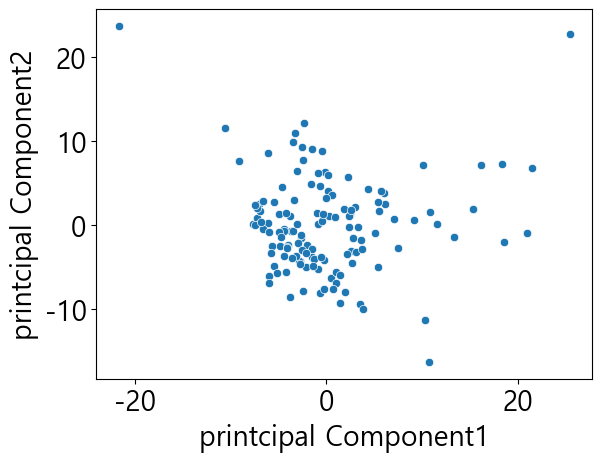

In [229]:
sns.scatterplot(data = principalDf, x = 'printcipal Component1', y = 'printcipal Component2')

In [230]:
principalDf.iloc[25]

printcipal Component1   5.5624
printcipal Component2   1.6676
Name: 25, dtype: float64

In [231]:
df_total.iloc[25]

배정번호                      118005
불량수량                           4
총수량                        59858
건조 1존 OP_Avg             70.5066
건조 1존 OP_Std              2.9440
건조 2존 OP_Avg             17.6525
건조 2존 OP_Std              2.8090
건조로 온도 1 Zone_Avg       100.0259
건조로 온도 1 Zone_Std         0.3771
건조로 온도 2 Zone_Avg       100.0350
건조로 온도 2 Zone_Std         0.2428
세정기_Avg                  66.7684
세정기_Std                   0.4394
소입1존 OP_Avg              70.3820
소입1존 OP_Std              22.5001
소입2존 OP_Avg              55.0579
소입2존 OP_Std               9.1259
소입3존 OP_Avg              49.0132
소입3존 OP_Std               9.9931
소입4존 OP_Avg              67.0798
소입4존 OP_Std              13.8970
소입로 CP 값_Avg              0.4235
소입로 CP 값_Std              0.0974
소입로 CP 모니터 값_Avg          0.0000
소입로 CP 모니터 값_Std          0.0000
소입로 온도 1 Zone_Avg       859.5094
소입로 온도 1 Zone_Std         2.4549
소입로 온도 2 Zone_Avg       860.1825
소입로 온도 2 Zone_Std         0.8780
소입로 온도 3 Zone_Avg       860.3246
소입로 온도 3 Z

In [232]:
principalDf.iloc[39]

printcipal Component1   -21.6531
printcipal Component2    23.6594
Name: 39, dtype: float64

In [233]:
df_total.iloc[39]

배정번호                      122460
불량수량                           1
총수량                        11552
건조 1존 OP_Avg             74.2808
건조 1존 OP_Std              0.5940
건조 2존 OP_Avg             31.1970
건조 2존 OP_Std              0.8999
건조로 온도 1 Zone_Avg        99.3857
건조로 온도 1 Zone_Std         0.0808
건조로 온도 2 Zone_Avg        98.8660
건조로 온도 2 Zone_Std         0.0393
세정기_Avg                  65.0129
세정기_Std                   0.0541
소입1존 OP_Avg              93.8661
소입1존 OP_Std               0.8122
소입2존 OP_Avg              55.7752
소입2존 OP_Std               0.3611
소입3존 OP_Avg              54.0530
소입3존 OP_Std               0.5487
소입4존 OP_Avg              71.1261
소입4존 OP_Std               0.4495
소입로 CP 값_Avg              0.4497
소입로 CP 값_Std              0.0008
소입로 CP 모니터 값_Avg          0.0000
소입로 CP 모니터 값_Std          0.0000
소입로 온도 1 Zone_Avg       858.9649
소입로 온도 1 Zone_Std         0.1249
소입로 온도 2 Zone_Avg       860.0178
소입로 온도 2 Zone_Std         0.1996
소입로 온도 3 Zone_Avg       860.1979
소입로 온도 3 Z

In [234]:
principalDf.iloc[77]

printcipal Component1   25.4027
printcipal Component2   22.6819
Name: 77, dtype: float64

In [235]:
df_total.iloc[77]

배정번호                      131758
불량수량                           9
총수량                        15015
건조 1존 OP_Avg             64.5778
건조 1존 OP_Std              5.0116
건조 2존 OP_Avg             16.1036
건조 2존 OP_Std              4.5376
건조로 온도 1 Zone_Avg       100.1591
건조로 온도 1 Zone_Std         0.5383
건조로 온도 2 Zone_Avg       100.0712
건조로 온도 2 Zone_Std         0.5154
세정기_Avg                  66.5325
세정기_Std                   0.4958
소입1존 OP_Avg              51.4359
소입1존 OP_Std               1.2182
소입2존 OP_Avg              50.7409
소입2존 OP_Std               0.9152
소입3존 OP_Avg              56.1879
소입3존 OP_Std               1.3102
소입4존 OP_Avg              66.4571
소입4존 OP_Std               0.5594
소입로 CP 값_Avg              0.3578
소입로 CP 값_Std              0.0864
소입로 CP 모니터 값_Avg          0.0000
소입로 CP 모니터 값_Std          0.0000
소입로 온도 1 Zone_Avg       860.0170
소입로 온도 1 Zone_Std         0.0838
소입로 온도 2 Zone_Avg       860.0391
소입로 온도 2 Zone_Std         0.1632
소입로 온도 3 Zone_Avg       860.0574
소입로 온도 3 Z

In [140]:
tmp = principalDf.drop([25, 39, 77], axis = 0)

<Axes: xlabel='printcipal Component1', ylabel='printcipal Component2'>

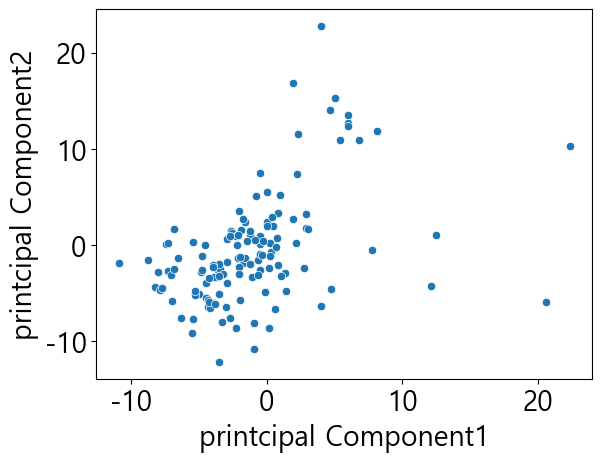

In [141]:
sns.scatterplot(data = tmp, x = 'printcipal Component1', y = 'printcipal Component2')

C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

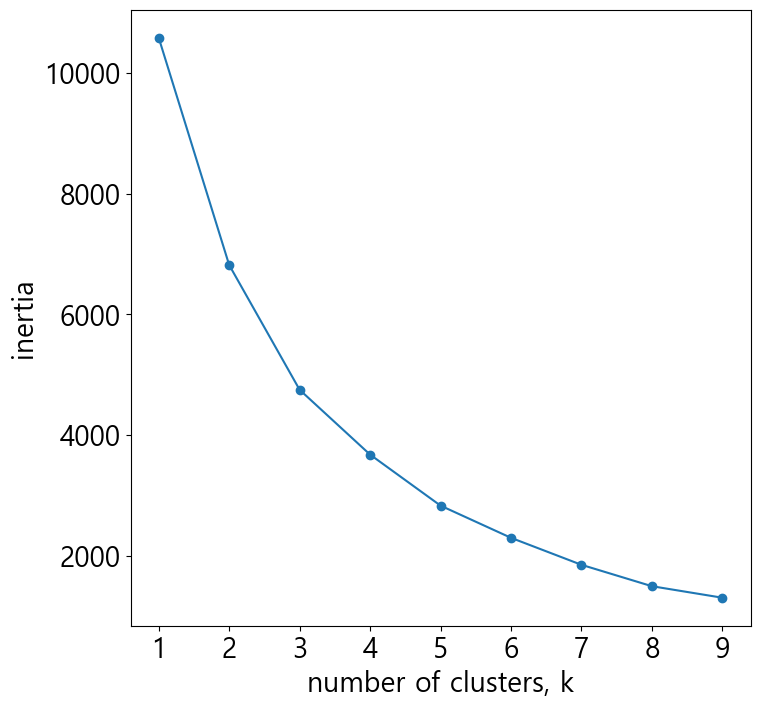

In [236]:
# 군집화
from sklearn.cluster import KMeans

# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합)
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(principalDf)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize = (8, 8))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [239]:
# K-Means 모델과 군집 예측값 생성
clust_model = KMeans(n_clusters = 3)

# 생성한 모델 데이터 학습
clust_model.fit(principalDf)

# 각 군집의 중심점
centers = clust_model.cluster_centers_
print(pd.DataFrame(centers))

# 각 예측군집
pred = clust_model.predict(principalDf)
print(pred)

C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\taek5\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        0       1
0 -4.5218  4.6857
1 -0.6659 -3.5745
2 11.9595  3.3857
[0 1 2 0 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 2 0 0 1 1 1 1 2 1 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 2 0 2 0
 2 1 1 2 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 2 0 1 0 1 1 0
 0 1 1 0 1 1 1 2 1 1 1 2 1 1 2 1 2 2 2 2 2 2 1 1 2]


In [240]:
# pca 데이터에 예측된 군집 붙이기
principalDf['clust'] = pred
principalDf

,printcipal Component1,printcipal Component2,clust
0,-0.9312,1.4517,0
1,0.2949,1.0872,1
2,4.3607,4.3140,2
3,-2.2908,12.0900,0
4,0.2410,4.0310,0
5,-0.1123,6.2892,0
6,10.1533,7.0936,2
7,-0.8133,6.1293,0
8,-1.5081,8.9828,0
9,0.2303,5.9245,0


In [242]:
principalDf['clust'].value_counts()

1    74
0    42
2    20
Name: clust, dtype: int64

# 데이터셋 분리 및 스케일링

## 불필요한 변수 삭제

In [36]:
# 불필요한 변수 삭제
df_total.drop(['배정번호', '불량수량', '총수량', '불량률'], axis = 1, inplace = True)

## 학습, 평가 데이터셋 분리

In [37]:
# 독립변수와 종속변수의 분리
X_num = df_total[['건조 1존 OP_Avg', '건조 1존 OP_Std', '건조 2존 OP_Avg', '건조 2존 OP_Std',
                  '건조로 온도 1 Zone_Avg', '건조로 온도 1 Zone_Std', '건조로 온도 2 Zone_Avg', '건조로 온도 2 Zone_Std', 
                  '세정기_Avg', '세정기_Std', '소입1존 OP_Avg', '소입1존 OP_Std', '소입2존 OP_Avg', '소입2존 OP_Std', 
                  '소입3존 OP_Avg', '소입3존 OP_Std', '소입4존 OP_Avg', '소입4존 OP_Std',
                  '소입로 CP 값_Avg', '소입로 CP 값_Std', '소입로 온도 1 Zone_Avg', '소입로 온도 1 Zone_Std', 
                  '소입로 온도 2 Zone_Avg', '소입로 온도 2 Zone_Std', '소입로 온도 3 Zone_Avg', '소입로 온도 3 Zone_Std',
                  '소입로 온도 4 Zone_Avg', '소입로 온도 4 Zone_Std', '솔트 컨베이어 온도 1 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Std', 
                  '솔트 컨베이어 온도 2 Zone_Avg', '솔트 컨베이어 온도 2 Zone_Std', 
                  '솔트조 온도 1 Zone_Avg', '솔트조 온도 1 Zone_Std']]
y = df_total['불량단계']

In [38]:
# 종속변수를 0과 1의 수치형 변수로 인코드
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [39]:
# 변환된 label classes 확인
print(le.classes_)

['안정' '위험']


In [40]:
# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X_num, y, test_size = 0.2, random_state = 1)

## 데이터 스케일링

In [41]:
# 특성 표준화
from sklearn.preprocessing import StandardScaler

# 변형 객체 생성
scaler = StandardScaler()

# 학습 데이터 스케일링
X_train_scaled = scaler.fit_transform(X_train_select)

# 테스트 데이터의 스케일링
X_test_scaled = scaler.fit_transform(X_test_select)

# 주요 변수 선택

## 변수 선택 기법

In [42]:
# 후진 제거법을 통한 변수 선택
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
rfe_selector = RFE(estimator = XGBClassifier(eval_metric = 'error'), n_features_to_select = 12, step = 10, verbose = 5)
rfe_selector.fit(X_train_scaled, y_train_select)
rfe_support = rfe_selector.get_support()
rfe_feature = X_num.loc[:, rfe_support].columns.tolist()
print(f'불량단계 예측 사용 변수 목록 : {rfe_feature}')

Fitting estimator with 34 features.
Fitting estimator with 24 features.
Fitting estimator with 14 features.
불량단계 예측 사용 변수 목록 : ['건조 1존 OP_Avg', '건조로 온도 1 Zone_Std', '건조로 온도 2 Zone_Avg', '소입1존 OP_Std', '소입3존 OP_Std', '소입로 CP 값_Avg', '소입로 온도 3 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Std', '솔트 컨베이어 온도 2 Zone_Avg', '솔트조 온도 1 Zone_Avg', '솔트조 온도 1 Zone_Std']


## 최종 변수 선택

In [43]:
# 최종 변수 선택
final_X = df_total[['건조 1존 OP_Avg', '건조로 온도 1 Zone_Std', '건조로 온도 2 Zone_Avg', 
                    '소입1존 OP_Std', '소입3존 OP_Std', '소입로 CP 값_Avg', 
                    '소입로 온도 3 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Avg', '솔트 컨베이어 온도 1 Zone_Std', 
                    '솔트 컨베이어 온도 2 Zone_Avg', '솔트조 온도 1 Zone_Avg', '솔트조 온도 1 Zone_Std']]

# 모델 구축과 학습 및 결과 분석

## 데이터 분리

In [44]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size = 0.2, random_state = 1)

## 데이터 스케일링

In [45]:
# 데이터 표준화
# 변형 객체 생성
scaler = StandardScaler()

# 학습 데이터 스케일링
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = scaler.fit_transform(X_test)

## GridSearchCV를 통한 하이퍼파라미터 튜닝

In [46]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score

# K FOLD 교차검증
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1)

# 하이퍼 파라미터
parameters_xc = {'n_estimators' : [20, 50, 100, 150, 200, 250, 300],
                'learning_rate' : [0.001, 0.05, 0.1, 0.15, 0.2],
                'max_depth' : [2, 4, 6, 8, 10, 12, 14, 16]}

# 모델 생성
model_xc = GridSearchCV(XGBClassifier(eval_metric = 'error'), parameters_xc, cv = kfold, verbose = 1, n_jobs = -1)

# 모델 학습
model_xc.fit(X_train_scaled, y_train)
print(f'XGBoost best 파라미터:{model_xc.best_params_}')

# xgboost
best_model_xc = model_xc.best_estimator_
best_model_xc.fit(X_train_scaled, y_train)

# 모델 예측
y_pred_xc = best_model_xc.predict(X_test_scaled)
score_xc = f1_score(y_test, y_pred_xc, average = 'macro')
print(f'불량탐지 XGBOOST f1_score :', score_xc)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
XGBoost best 파라미터:{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50}
불량탐지 XGBOOST f1_score : 0.6690307328605201


## 예측 결과 확인

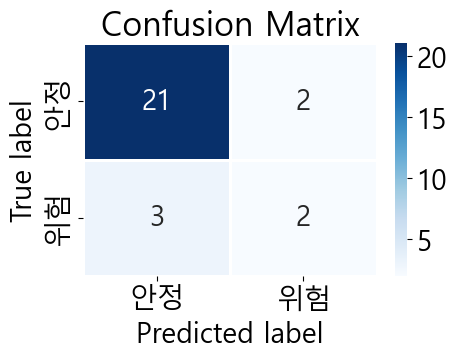

In [47]:
# 혼동행렬을 통한 예측 결과 확인
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xc)
class_names = ['안정', '위험']
fig = plt.figure(figsize = (5, 4))
ax = sns.heatmap(cm ,annot = True, cmap = 'Blues', linewidths = 1, fmt = 'd',
                xticklabels = ['안정', '위험'], yticklabels = ['안정', '위험'])
ax.set(title = 'Confusion Matrix',
      ylabel = 'True label',
      xlabel = 'Predicted label')
plt.tight_layout()

In [48]:
from sklearn.metrics import classification_report
y_pred_xc = best_model_xc.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xc, target_names = ['안정', '위험']))

              precision    recall  f1-score   support

          안정       0.88      0.91      0.89        23
          위험       0.50      0.40      0.44         5

    accuracy                           0.82        28
   macro avg       0.69      0.66      0.67        28
weighted avg       0.81      0.82      0.81        28

